# Chapter 3: Nonlinear Equations in One Variable

Based on the Matlab [files](http://www.siam.org/books/cs07/programs.zip) for the book [A First Course in Numerical Methods](http://www.siam.org/books/cs07/), by Ascher and Greif.

Julia version by Michael P. Friedlander and Michael P. Wathen.

In [42]:
using PyPlot

# Root finding

Code showing real roots of three function: (i) $f(x) = \sin(x)$ on $[0, 4\pi]$ , (ii) $f(x) = x^3 − 30 x^2 + 2552$ on $[0, 20]$, and (iii) $f(x) = 10\cosh(x/4) − x$ on $[− 10, 10]$.

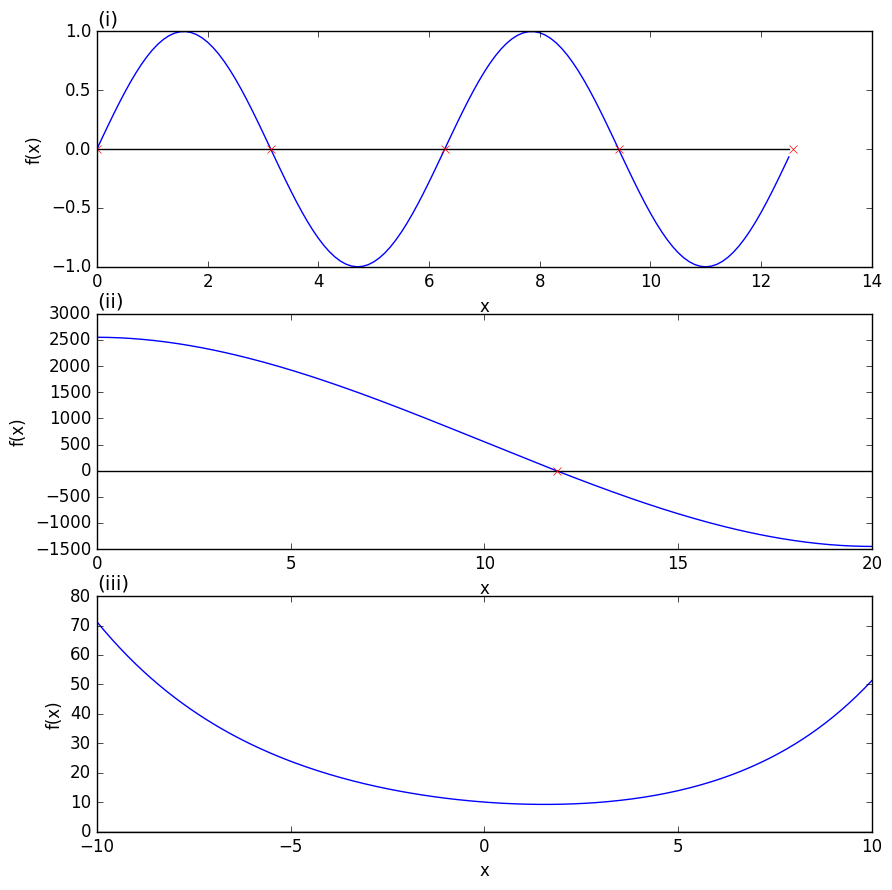

In [2]:
fig = figure("pyplot_subplot_mixed",figsize=(10,10))

t = 0:.1:4pi
tt = sin(t)
ax = zeros(length(t))
xrt = 0:pi:4pi
yrt = zeros(5)
subplot(3,1,1)
plot(t,tt,"b",t,ax,"k",xrt,yrt,"rx")
title("(i)", loc="left")
xlabel("x")
ylabel("f(x)")

t = 0:.1:20
tt = t.^3 - 30*t.^2 + 2552
ax = zeros(length(t))
subplot(3,1,2)
plot(t,tt,"b",t,ax,"k",11.8615,0,"rx")
title("(ii)", loc="left")
xlabel("x")
ylabel("f(x)")

t = -10:.1:10
tt = 10 * cosh(t ./4) - t
ax = zeros(length(t))
subplot(3,1,3)
plot(t,tt,"b",t,ax,"k")
title("(iii)", loc="left")
xlabel("x")
ylabel("f(x)");

## Bisection method

Root finding with the [biscetion method](https://en.wikipedia.org/wiki/Bisection_method).

In [43]:
# Assume f(a)*f(b)<0 and that there is a value root in (a,b) such that func(root) = 0.
# Return a value `p` such that 
#      | p - root | < atol
# and in n the number of iterations required.
function bisect(f, a, b; atol=1e-6, ftol=1e-6, verbose=false)
    fa, fb = f(a), f(b)
    if (a ≥ b) || (fa*fb ≥ 0)
        error("Incorrect inputs!")
    end
    n = ceil(log2(b-a) - log2(2*atol))
    verbose && @printf "%4s: %15s  %15s  %10s  %10s  %10s\n" "n" "a" "b" "fa" "fb" "fp"
    for k in 1:n
        p = (a+b)/2
        fp = f(p)
        verbose && @printf "%4i: %15.5e  %15.5e  %10.2e  %10.2e  %10.2e\n" k a  b fa fb fp
        if abs(fp) < atol
            return p, n
        end
        if fa*fp < 0
            b, fb = p, fp
        else
            a, fa = p, fp
        end
    end
    p = (a+b)/2
    return p, n
end;

Apply bisection to compute $\sqrt2 $. We do this by applying bisection to the function
$$
f(x):=x^2 - 2,
$$
and observe that $f(x)=0$ if and only if $x=\sqrt2$. We'll use the bracket $[1,2]$.

In [44]:
f = x -> x^2 - 2
x, n = bisect(f, 1, 2, verbose=true)
err = abs(x - sqrt(2))/sqrt(2)

   n:               a                b          fa          fb          fp
   1:     1.00000e+00      2.00000e+00   -1.00e+00    2.00e+00    2.50e-01
   2:     1.00000e+00      1.50000e+00   -1.00e+00    2.50e-01   -4.38e-01
   3:     1.25000e+00      1.50000e+00   -4.38e-01    2.50e-01   -1.09e-01
   4:     1.37500e+00      1.50000e+00   -1.09e-01    2.50e-01    6.64e-02
   5:     1.37500e+00      1.43750e+00   -1.09e-01    6.64e-02   -2.25e-02
   6:     1.40625e+00      1.43750e+00   -2.25e-02    6.64e-02    2.17e-02
   7:     1.40625e+00      1.42188e+00   -2.25e-02    2.17e-02   -4.27e-04
   8:     1.41406e+00      1.42188e+00   -4.27e-04    2.17e-02    1.06e-02
   9:     1.41406e+00      1.41797e+00   -4.27e-04    1.06e-02    5.10e-03
  10:     1.41406e+00      1.41602e+00   -4.27e-04    5.10e-03    2.34e-03
  11:     1.41406e+00      1.41504e+00   -4.27e-04    2.34e-03    9.54e-04
  12:     1.41406e+00      1.41455e+00   -4.27e-04    9.54e-04    2.63e-04
  13:     1.41406e+00    

4.043542140047818e-7

# Fixed-point iteration

Root finding with the [fixed-point](https://en.wikipedia.org/wiki/Fixed-point_iteration) iteration.

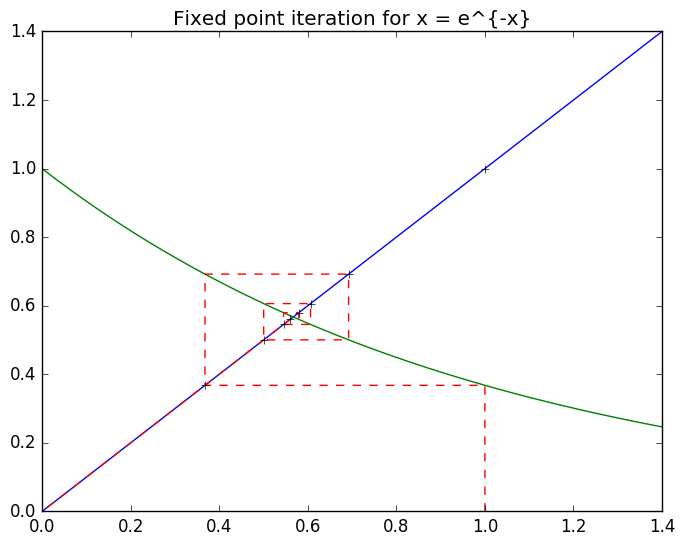

PyObject <matplotlib.text.Text object at 0x3236f1a50>

  likely near /Users/mpf/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/mpf/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/mpf/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/mpf/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/mpf/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/mpf/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/mpf/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/mpf/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/mpf/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/mpf/.julia/v0.5/IJulia/src/kernel.jl:31


In [41]:
x = 0:.01:1.4
y1 = x
y2 = exp(-x)
plot(x,y1,x,y2)

n=8; xx = zeros(n); zer = xx
xx[1] = 1
for j = 1:n-1
    xx[j+1] = exp(-xx[j])
end
itx = zeros(2*length(xx))
itx[1:2:2*n-1] = xx
itx[2:2:2*(n-1)] = xx[1:n-1]
ity = zeros(length(itx))
ity[1] = 0
ity[2:2:2*(n-1)] = xx[2:n]
ity[3:2:2*n-1] = xx[2:n]
plot(itx,ity,"r--")
plot(xx,zer,"k+")
title("Fixed point iteration for x = e^{-x}");

In [ ]:
x = [0 10];
plot(x,x,"g")
axis([0., 10., 0., 14.])

x = [0:.01:10];
y = 2*cosh(x/4);
plot(x,y,"b")
xlabel("x")

# find the two points where these curves meet and mark them
a = 2;
for k = 1:4
    a = a - (2*cosh(a/4) - a)/(.5*sinh(a/4)-1);
end
b = 8;
for k = 1:4
    b = b - (2*cosh(b/4) - b)/(.5*sinh(b/4)-1);
end
println(b)
plot([a, b],[a, b],"g")

# Newton's method

Root findin with <a href='https://en.wikipedia.org/wiki/Newton%27s_method'>Newton's method</a>.

In [ ]:
x=[-1:.001:1];
x0=0.5;
x1=x0-(sin(2*x0)+0.1)/(2*cos(2*x0));
x2=x1-(sin(2*x1)+0.1)/(2*cos(2*x1));
axis([-1, 1, -1, 1.5])
plot(x,sin(2*x)+0.1, "b")
xlabel("x")

plot(linspace(-1,1),linspace(0,0),"k");
plot(linspace(x0,x1),linspace(sin(2*x0)+0.1,0),"g");
plot(linspace(x1,x2),linspace(sin(2*x1)+0.1,0),"g");

plot(linspace(x0,x0),linspace(0,sin(2*x0)+0.1),"r:");
plot(linspace(x1,x1),linspace(0,sin(2*x1)+0.1),"r:");

plot ([x0,x1,x2],[0,0,0],"+")